In [322]:
#Importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [323]:
df=pd.read_csv("E:/Masters/Company/showwcase_sessions.csv")

In [324]:
df.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


### Converting login_date to DATE Format

In [325]:
df['login_date'] =  pd.to_datetime(df['login_date'], format='%m/%d/%y')

In [326]:
df['day_of_week'] = df['login_date'].dt.day_name()

In [327]:
df.dtypes

session_id                       float64
customer_id                      float64
login_date                datetime64[ns]
projects_added                    object
likes_given                       object
comment_given                     object
inactive_status                   object
bug_occured                       object
session_projects_added           float64
session_likes_given              float64
session_comments_given           float64
inactive_duration                float64
bugs_in_session                  float64
session_duration                 float64
day_of_week                       object
dtype: object

### Let's check if we have any null values

In [241]:
df.isnull().sum(axis = 0)

session_id                2
customer_id               2
login_date                2
projects_added            2
likes_given               2
comment_given             2
inactive_status           2
bug_occured               2
session_projects_added    2
session_likes_given       3
session_comments_given    2
inactive_duration         2
bugs_in_session           2
session_duration          2
day_of_week               2
dtype: int64

In [242]:
df.dropna(inplace=True)

### Removing all NA values as they are very few!

In [328]:
df.isnull().sum(axis = 0)

session_id                2
customer_id               2
login_date                2
projects_added            2
likes_given               2
comment_given             2
inactive_status           2
bug_occured               2
session_projects_added    2
session_likes_given       3
session_comments_given    2
inactive_duration         2
bugs_in_session           2
session_duration          2
day_of_week               2
dtype: int64

In [329]:
df.shape

(302, 15)

### In general, session duration needs to be more than inactive_duration because session_duration needs to account inactive duration.

### Hence, we remove all those ambiguity rows

In [245]:
df=df[df['inactive_duration']<df['session_duration']]

In [246]:
df.shape

(212, 15)

### Now coming to actual scenario. I am calculating engagement as 'Activity registered by a customer'(whether user added any projects, liked or commented on any post
### PS: Just checking whether they did the things but not checking how many projects/likes/comments he they in session :)

### For this, first I am grouping by customers and counting how many times a user added project/liked/commented.

### For example in the month of Oct, userid 123 has 3 session id's and I am considering columns 'projects_added','likes_given', 'comment_given'. Total we have 3 sessions and 3 columns. Hence, I have 9 values with me. Out of these 9 how many times user was engaged with my platform. This can be taken by counting Number of "True" from those 9 values and produce a value for 'engagement'.

### This value denotes my User Engagement!

In [247]:
df_a=df.groupby(['customer_id'])['projects_added'].count().reset_index(name="total_reactions_per_customer")



In [248]:
import pandas as pd
df0=pd.concat([df_a,df_b,df_c], axis=1)

df0=df0.iloc[:,[0,1,3,5]]

In [249]:
df0.head()

,customer_id,total_reactions_per_customer,total_likes_given,total_comment_given
0,10246.0,3.0,4,4
1,12407.0,7.0,8,8
2,12496.0,4.0,6,6
3,12940.0,4.0,5,5
4,14354.0,12.0,15,15


In [250]:

#df_d=df.groupby(['customer_id'])['projects_added','likes_given', 'comment_given']
df_d=df[(df['projects_added']==True)]
df_e=df[(df['likes_given']==True)]
df_f=df[(df['comment_given']==True)]


In [251]:
df_d1=df_d.groupby(['customer_id'])['projects_added'].count().reset_index(name="count_projects_added")
df_e1=df_e.groupby(['customer_id'])['likes_given'].count().reset_index(name="count_likes_given")
df_f1=df_f.groupby(['customer_id'])['comment_given'].count().reset_index(name="count_comment_given")

In [252]:
import pandas as pd
df1=pd.concat([df_d1,df_e1,df_f1], axis=1)

df1=df1.iloc[:,[0,1,3,5]]

In [253]:
df1.head()

,customer_id,count_projects_added,count_likes_given,count_comment_given
0,10246.0,2,3.0,1.0
1,12407.0,6,5.0,7.0
2,12496.0,2,4.0,2.0
3,12940.0,1,3.0,4.0
4,14354.0,11,7.0,11.0


In [254]:
df_look=pd.concat([df_a,df1],axis=1)

df_look=df_look.iloc[:,[0,1,3,4,5]]

df_look.head()

,customer_id,total_reactions_per_customer,count_projects_added,count_likes_given,count_comment_given
0,10246.0,3,2.0,3.0,1.0
1,12407.0,7,6.0,5.0,7.0
2,12496.0,4,2.0,4.0,2.0
3,12940.0,4,1.0,3.0,4.0
4,14354.0,12,11.0,7.0,11.0


In [255]:
df_look.columns

Index(['customer_id', 'total_reactions_per_customer', 'count_projects_added',
       'count_likes_given', 'count_comment_given'],
      dtype='object')

In [256]:
df_look.head()

,customer_id,total_reactions_per_customer,count_projects_added,count_likes_given,count_comment_given
0,10246.0,3,2.0,3.0,1.0
1,12407.0,7,6.0,5.0,7.0
2,12496.0,4,2.0,4.0,2.0
3,12940.0,4,1.0,3.0,4.0
4,14354.0,12,11.0,7.0,11.0


In [257]:
df_look['engagement']=(df_look['count_projects_added']+df_look['count_comment_given']+df_look['count_likes_given'])/((df_look['total_reactions_per_customer'])*3)

In [258]:
df_look['index']=df_look.index

In [259]:
df_look.head()

,customer_id,total_reactions_per_customer,count_projects_added,count_likes_given,count_comment_given,engagement,index
0,10246.0,3,2.0,3.0,1.0,0.666667,0
1,12407.0,7,6.0,5.0,7.0,0.857143,1
2,12496.0,4,2.0,4.0,2.0,0.666667,2
3,12940.0,4,1.0,3.0,4.0,0.666667,3
4,14354.0,12,11.0,7.0,11.0,0.805556,4


ValueError: Invalid RGBA argument: masked

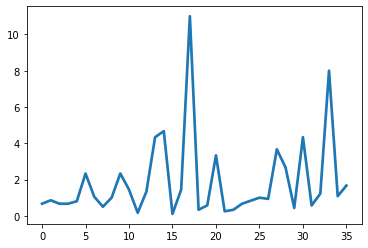

In [332]:
ax=sns.pointplot(df_look['index'],df_look['engagement'])
ax.set(xlabel='index_of_customer',ylabel='user engagement')
plt.show()

### PS: Here, each value is an index which is unique to each customer!

### From this plot, we can get customers having maximum user engagement and we can recommend things accordingly. 

### If user has high engagement, then it means user MIGHT be actively looking for new jobs and we can recommend things like -> personal guide, resume review, any premium  subscriptions  etc.

###    

### The second analysis is same as first one but here I check amount of engagement

In [ ]:
df_g1=df.groupby(['customer_id','login_date'])['session_projects_added'].sum().reset_index(name="session_projects_added")
df_h1=df.groupby(['customer_id','login_date'])['session_likes_given'].sum().reset_index(name="session_likes_given")
df_i1=df.groupby(['customer_id','login_date'])['session_comments_given'].sum().reset_index(name="session_comment_given")

In [280]:
df2=pd.concat([df_g1,df_h1,df_i1], axis=1)

df2=df2.iloc[:,[0,1,2,5,8]]



In [283]:
df2['engagement']=df2['session_comment_given']+df2['session_projects_added']+df2['session_likes_given']

In [284]:
df2.head()

,customer_id,login_date,session_projects_added,session_likes_given,session_comment_given,engagement
0,10246.0,2019-10-06,3.0,16.0,3.0,22.0
1,10246.0,2019-10-15,0.0,14.0,0.0,14.0
2,10246.0,2019-10-21,2.0,16.0,0.0,18.0
3,12407.0,2019-10-17,2.0,22.0,5.0,29.0
4,12407.0,2019-10-18,1.0,26.0,2.0,29.0


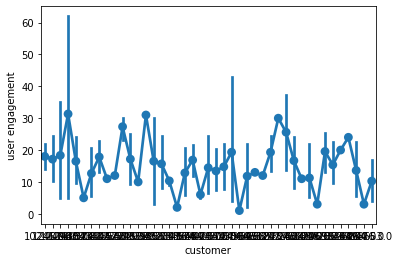

In [334]:
ax=sns.pointplot(df2['customer_id'],df2['engagement'])
ax.set(xlabel='customer',ylabel='user engagement')
plt.show()

### We could see plot almost follows the previous and conclusions remain the same! 

###   

### The next part is an interesting thing.

### From the date column, I derived Day of week and tried to calculate ALL user engagement per day!

### Let's get into it and see what we can infer.

In [266]:
df_j1=df.groupby(['day_of_week'])['session_projects_added'].sum().reset_index(name="session_projects_added_by_day")
df_k1=df.groupby(['day_of_week'])['session_likes_given'].sum().reset_index(name="session_likes_given_by_day")
df_l1=df.groupby(['day_of_week'])['session_comments_given'].sum().reset_index(name="session_comment_given_by_day")

In [351]:
df3=pd.concat([df_j1,df_k1,df_l1], axis=1)

df3=df3.iloc[:,[0,1,3,5]]

df3.head()

,day_of_week,session_projects_added_by_day,session_likes_given_by_day,session_comment_given_by_day
0,Friday,38.0,309.0,54.0
1,Monday,38.0,343.0,57.0
2,Saturday,64.0,539.0,92.0
3,Sunday,46.0,297.0,73.0
4,Thursday,42.0,248.0,73.0


In [354]:
df3['engagement_per_day']=df3['session_projects_added_by_day']+df3['session_likes_given_by_day']+df3['session_comment_given_by_day']
df3_1=df3

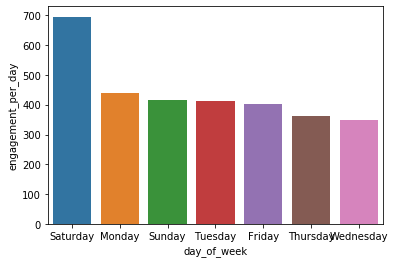

In [341]:
plot_col=['day_of_week','engagement_per_day']
df3 = df3.sort_values('engagement_per_day',ascending=False).reset_index()
sns.barplot(x='day_of_week',y='engagement_per_day',data=df3)

### We could see maximum user activity is seen on Sat/Sun/Mon

### So, we can request our marketing department to increase advertisements for these days thus bringing more profit to our company!

###   

### Now lets check our BUGS reported per Day of week and see whether it is correlated with our user engagement!

In [352]:
df_m1=df.groupby(['day_of_week'])['bugs_in_session'].sum().reset_index(name="bugs_added_by_day")
df_m1_1=df_m1

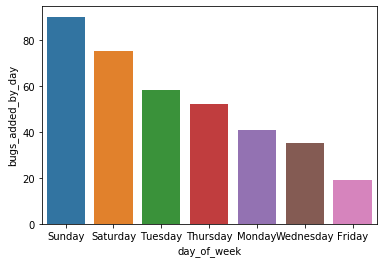

In [347]:
df_m1 = df_m1.sort_values('bugs_added_by_day',ascending=False).reset_index()
sns.barplot(x=df_m1['day_of_week'],y=df_m1['bugs_added_by_day'])

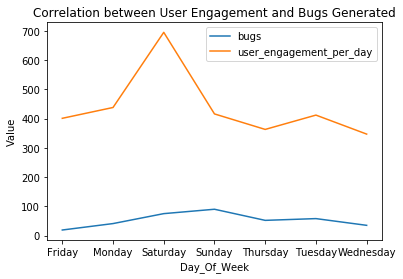

In [355]:
import matplotlib.pyplot as plt
plt.plot(df_m1_1['day_of_week'],df_m1_1['bugs_added_by_day'],label='bugs')
plt.plot(df3_1['day_of_week'],df3_1['engagement_per_day'],label='user_engagement_per_day')
plt.xlabel('Day_Of_Week')
plt.ylabel('Value')
plt.title('Correlation between User Engagement and Bugs Generated')
plt.legend()


### Could see that bugs are generated more on Sat/Sun which were surprisingly  seen having high user activity.

### Hence, our technical team should look into this and make sure servers/services run properly during these days as company revenue will be high during these days!

###  

### Let's see bugs reported per customer

In [294]:
df4=df.groupby(['customer_id'])['bugs_in_session'].sum().reset_index(name="bugs_per_customer")
df4['index']=df4.index

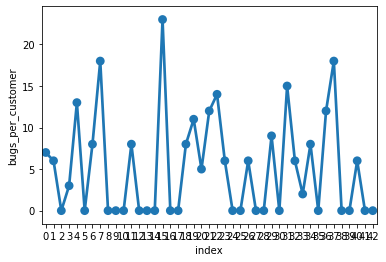

In [312]:
g=sns.pointplot(x=df4['index'],y=df4['bugs_per_customer'])
#plt.xticks(rotation=30)
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)

plt.show()

### From this plot, we get idea about customers who are reporting more bugs. This may be bad indication for us.

### We may loose this customer. Hence, our support team must quickly react to these and keep contacting them which build good relationship thus not loosing a valuable user!